## Dataset Details

Column Descriptions:
- **age:** Age of the patient in years
- **sex:** Male: 1; Female: 0
- **cp** (chest pain type):
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal
    - 3: asymptomatic
- **trestbps**: patient's level of blood pressure at resting mode in mm/HG
- **chol** (serum cholesterol in mg/dl)
- **fbs:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false 
- **restecg:** Result of electrocardiogram while at rest:
    - 0 : Normal 
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
        0.05 mV) 
    - 2: showing probable or definite left ventricular hypertrophyby Estes' criteria
- **thalach:** maximum heart rate achieved
- **exang:** exercise-induced angina (True/ False)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** ST segment measured in terms of slope during peak exercise
    - 0: up sloping
    - 1: flat 
    - 2: down sloping
- **ca:** number of major vessels (0-3) colored by fluoroscopy
- **thal** (blood disorder called thalassemia):  
    - 0: NULL 
    - 1: normal blood flow 
    - 2: fixed defect (no blood flow in some part of the heart) 
    - 3: reversible defect (a blood flow is observed but it is not normal)
- **target:**  
    - 1 means patient is suffering from heart disease
    - 0 means patient is normal

## Preparing the dataset

In [3]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#observing the dataset
df_original = pd.read_csv('heart_disease_cleveland_patients.csv')
df_originabl.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0


In [5]:
#checking for missing values
df_original.isna().sum()

#no missing values observed in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
col_array = np.array(df_original.columns) #converting column list to an array to use in for loop
col_array = np.delete(col_array, [1,2,5,6,8,10,11,12,13]) #deleting categorical columns for descriptive statistic analysis

#calculating descriptive statistics for every column
for col in col_array:
    print(f'Descriptive statistics for "{col}": \n {df_original[col].describe()} \n')


Descriptive statistics for "age": 
 count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64 

Descriptive statistics for "trestbps": 
 count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64 

Descriptive statistics for "chol": 
 count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64 

Descriptive statistics for "thalach": 
 count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64 

Descriptive statistics for "oldpeak": 
 count    303.000000
mean       1.039604
std 

- age: It can be seen that the sample size range from adults in their early thirties to senior citizens. The mean is $\approx$ 54.439, which suggests that the data is skewed towards middle-aged citizens. This is further evidenced by the value of the first quartile: 48, which implies that only 25% of the sample size is below the age of 48. 
- trestbps: From the output it can be seen that mean is 131 and the median is 130. The only slightly alarming observation in the output is the max value of 200. As the mean is 131 and the third quartile is 140, there may be a possibility that a value of 200 is an outlier. This can be verified through a box plot. 
- chol:  For adults, cholestrol levels between 200-239 mg/dl are considered borderline high, and levels of 240 mg/dl or higher are considered high. The mean is 246, suggesting that most of the sample size has high cholestrol, which may lead to inaccurate conclusions. This is further evidenced by a Q1 value of 211, implying that 75% of the dataset has borderline high or high cholestrol. The max value is 564 mg/dl, which seems dangerously high and therefore it could be an outlier.

Box plot for age: 



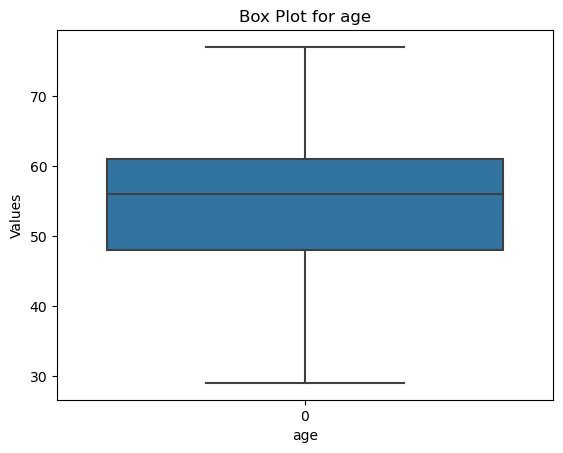

Box plot for trestbps: 



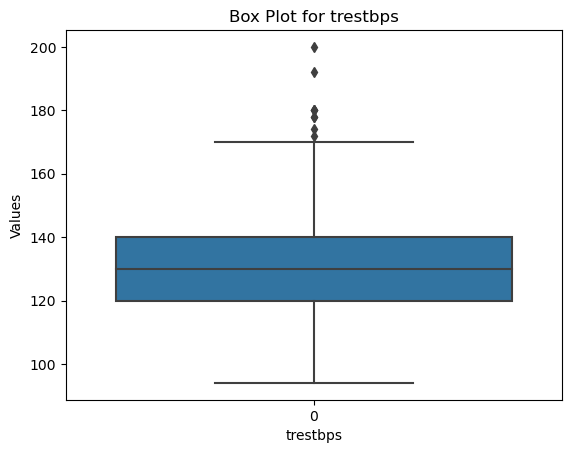

Box plot for chol: 



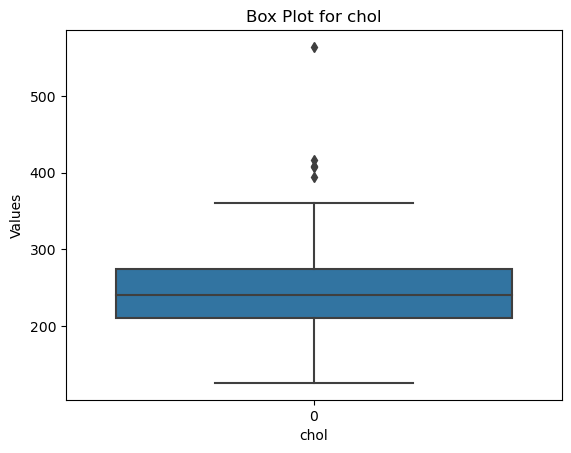

Box plot for thalach: 



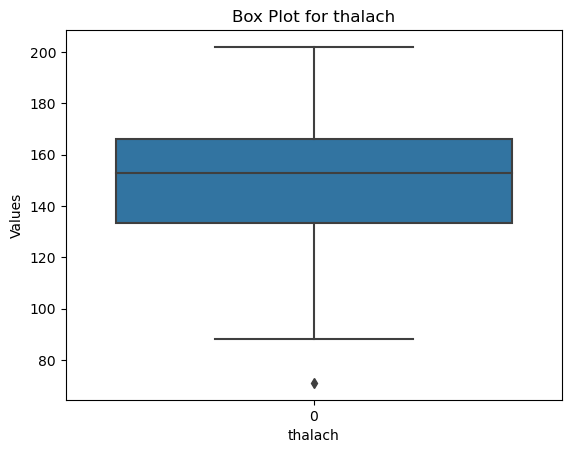

Box plot for oldpeak: 



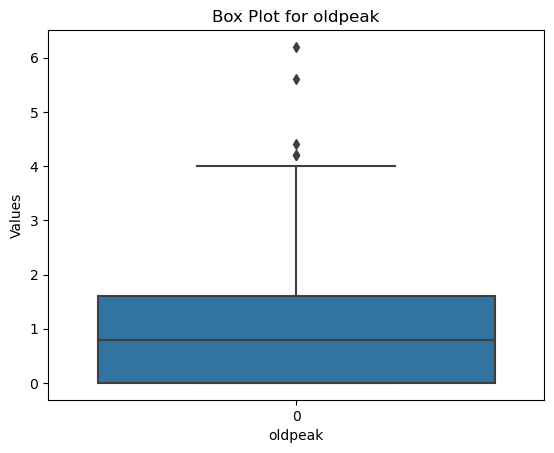

In [15]:
#plotting boxplots to observe outliers and distribution
for col in col_array: 
    print(f"Box plot for {col}: \n")
    sns.boxplot(data = np.array(df_original[col]))
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()

age: plot shows no outliers for age

trestbps: plot suggests that every value above $\approx 170$ is an outlier - heart rate values above 170 at rest are considered extremely abnormal. Any indivdual with that rate would be unable to provide data as he/she would be in need of immediate medical help. Due to this reasoning, the values will be filterd.  

chol: plot suggests every value above $\approx 360$ is an outlier

thalach: plot shows one outlier below 80

oldpeak: plot suggests every value above $\approx 4$ is an outlier - while this conclusion makes sense theoretically, vaues for ST dperession between 4 and 5 have been observed. Hence, only values above 5 will be filtered. 

In [17]:
#dealing with outliers in trestbps
df_original = df_original[df_original.trestbps <= 170]

In [18]:
#dealing with outliers in chol
df_original = df_original[df_original.chol <= 360]

In [19]:
#dealing with outliers in thalach
df_original = df_original[df_original.thalach > 80]

In [20]:
#dealing with outliers in oldpeak:
df_original = df_original[df_original.oldpeak < 5]

Box plot for age: 



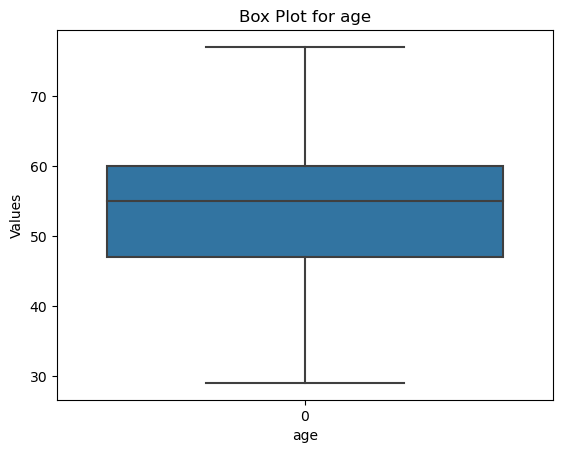

Box plot for trestbps: 



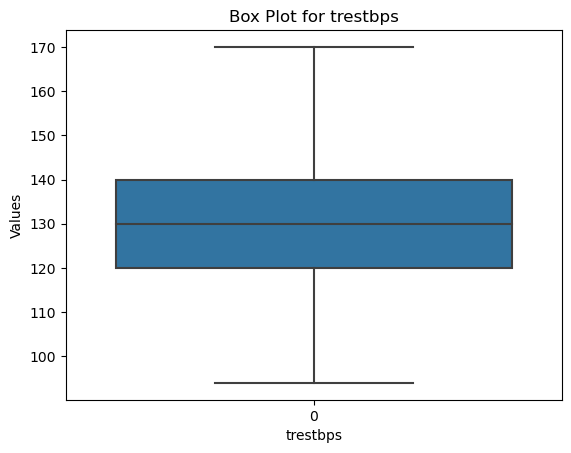

Box plot for chol: 



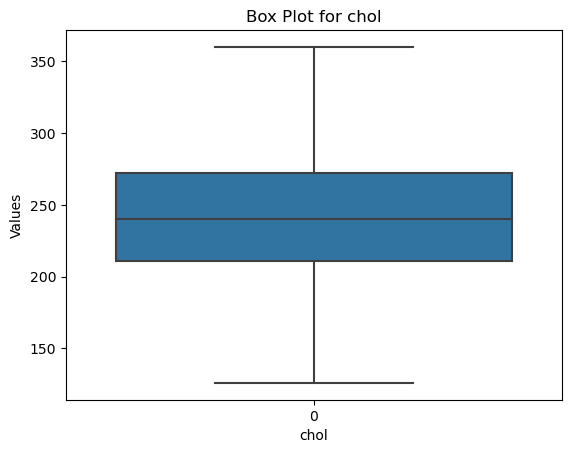

Box plot for thalach: 



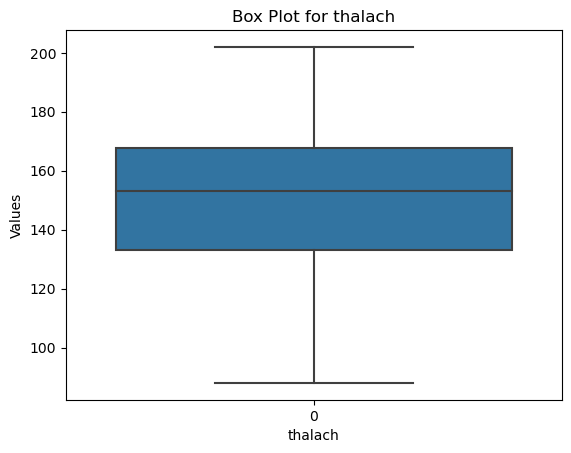

Box plot for oldpeak: 



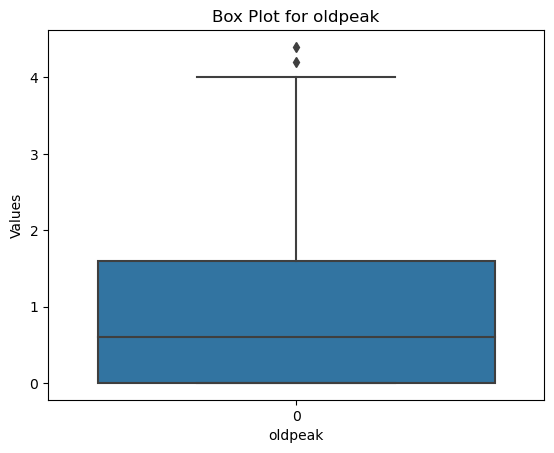

In [21]:
#plot boxplot to check if outliers have been removed
for col in col_array: 
    print(f"Box plot for {col}: \n")
    sns.boxplot(data = np.array(df_original[col]))
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()

All outliers have been removed.

#### Exploring the categorical columns

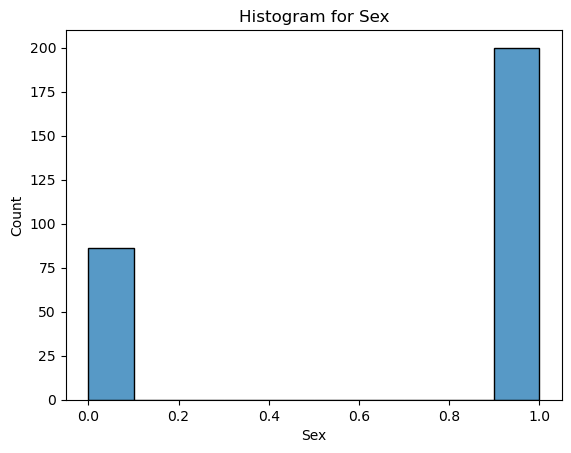

In [23]:
#observing distribution of sex
sns.histplot(df_original['sex'])
plt.title(f"Histogram for Sex")
plt.xlabel('Sex')
plt.ylabel("Count")
plt.show()

In [27]:
df_original.groupby('sex')['sex'].count()

sex
0     86
1    200
Name: sex, dtype: int64

There are 114 more men in the sample size, suggesting that results may be inaccurate for the population.

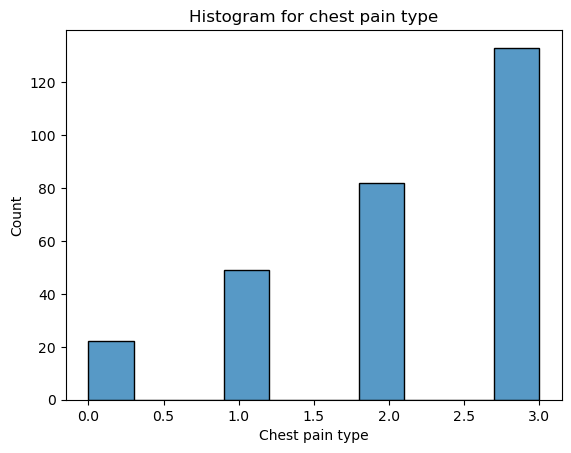

In [28]:
#observing cp column
sns.histplot(df_original['cp'])
plt.title(f"Histogram for chest pain type")
plt.xlabel('Chest pain type')
plt.ylabel("Count")
plt.show()

Asymptomatic pain is most commonly observed in the sample size. Taking a step further, we can observe if this differs by age: 

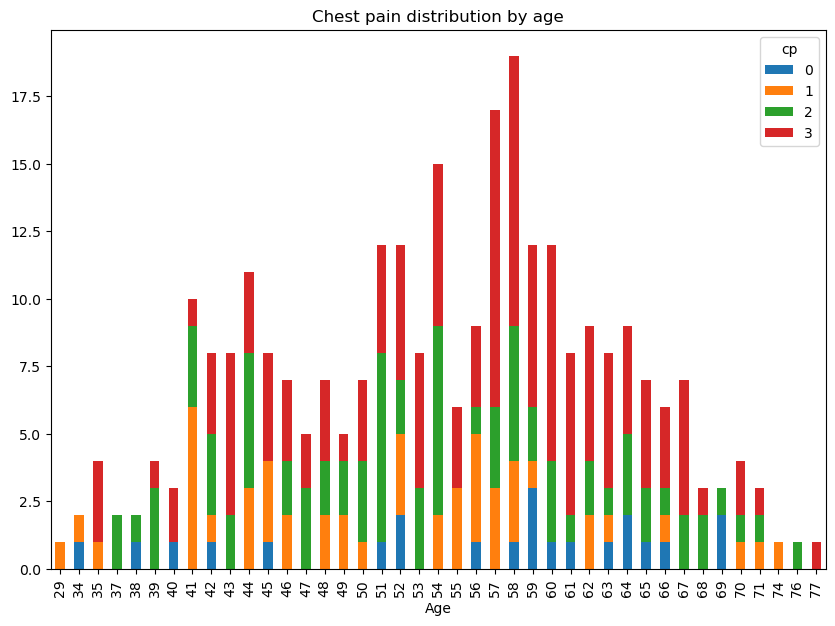

In [36]:
df_age_cp = df_original.groupby(['age', 'cp']).size().unstack(fill_value=0)
df_age_cp.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Chest pain distribution by age')
plt.xlabel('Age')
plt.legend(title='cp')
plt.show()

Asymptomatic (Red): This is the most common chest pain type across almost all age groups. It shows a significant presence especially in the age ranges 50-60.

Non-anginal (Green): This type is also relatively common and is seen across various age groups but with less frequency compared to type 3.

Atypical angina (Orange): Less common than types 2 and 3 but still present across many age groups.

Typical angina (Blue): The least common type, with sporadic occurrences in the dataset.

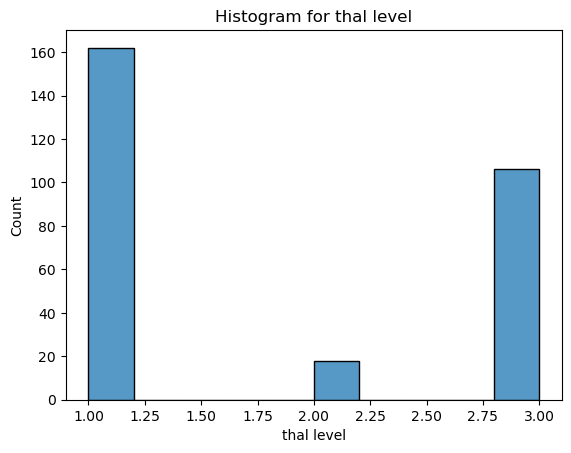

In [37]:
#observing thal column
sns.histplot(df_original['thal'])
plt.title(f"Histogram for thal level")
plt.xlabel('thal level')
plt.show()

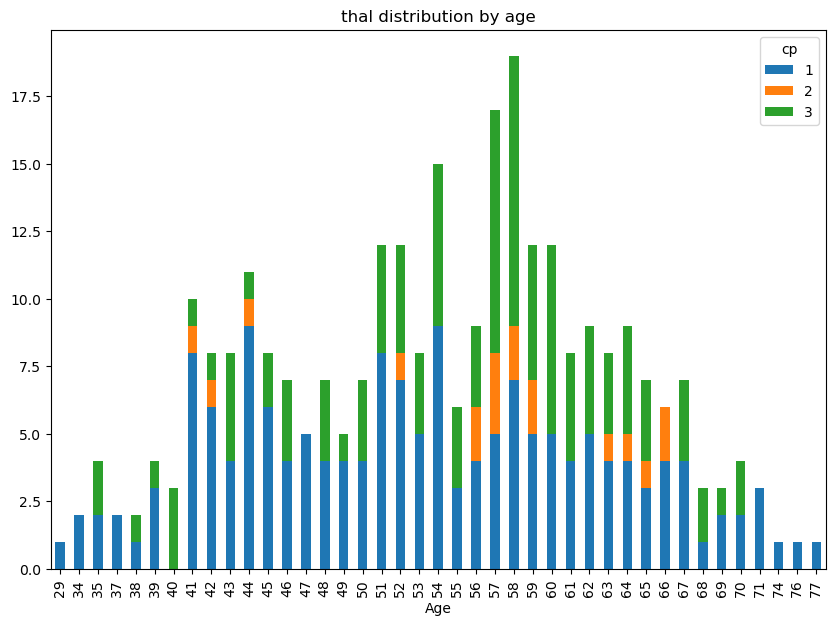

In [38]:
#observing thal conditions based on age
df_age_cp = df_original.groupby(['age', 'thal']).size().unstack(fill_value=0)
df_age_cp.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('thal distribution by age')
plt.xlabel('Age')
plt.legend(title='cp')
plt.show()

Normal Blood Flow (Blue): This type is quite frequent across various age groups, particularly in the age range of 40-50.

Fixed Defect (Orange): This type is less common but still present across multiple age groups. It is sporadically distributed.

Reversible Defect (Green): This is the most frequent type, particularly prominent in the age range of 50-60.

### Bivariate Analysis

In [43]:
df_corr = df_original.drop(df_original.columns[[1,2,5,6,8,10,11,12,13]], axis=1)
corr_mat = df_corr.corr()
corr_mat

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.281750,0.173186,-0.407263,0.200507
trestbps,0.281750,1.000000,0.118514,-0.068867,0.127394
chol,0.173186,0.118514,1.000000,-0.025359,0.018794
thalach,-0.407263,-0.068867,-0.025359,1.000000,-0.347206
oldpeak,0.200507,0.127394,0.018794,-0.347206,1.000000


The above can be represented by a heatmap as well:

<AxesSubplot: >

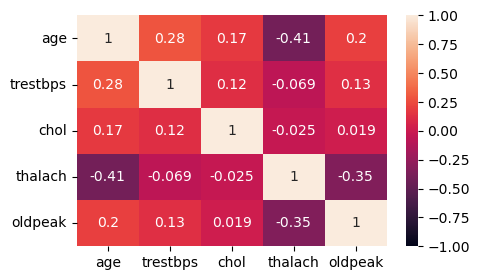

In [46]:
plt.figure(figsize=(5,3))
sns.heatmap(corr_mat, annot=True, vmin=-1, vmax=1)

**The above can also be viewed through a pairplot**

**A connection that would be interesting to observe is the difference in cholestrol levels between healthy people and people without a heart disease.** This would be interesting to test due to the common claim that "high cholestrol results in poor cardiac health" hold true for this sample. 

This will be done in two steps:
1. Segregate df_original into patients with and without heart disease and observe the difference in mean cholestrol level 
2. Conduct a difference in means hypothesis test to establish siginificance of conclusion on the population


In [50]:
#segregating dataframes
df_poor_health = df_original[df_original.target == 1]
df_good_health = df_original[df_original.target == 0]
poor_health_mean = df_poor_health['chol'].mean()
good_health_mean = df_good_health['chol'].mean()
print(f"The difference between average cholestrol levels for those with poor and good heart health is: {poor_health_mean-good_health_mean}")

The difference between average cholestrol levels for those with poor and good heart health is: 10.87341772151899


In [51]:
#conducting the difference in means test 

Hypotheses for the test:
- µ<sub>h</sub> represents the mean cholestrol levels for patients that have a heart disease
- µ<sub>n</sub> represent the mean cholestrol levels for patients that have normal health

$H_0: \mu_h - \mu_n = 0$

$H_{\alpha}: \mu_h \neq \mu_n$

**Conditions:**
1. Sample of patients with normal health levels is randomly sampled: this condition is satisfied. 
2. $n_{h}=164<10$% of all patients in Cleveland who have normal levels of health: this condition is satisfied because it can be assumed that the total number of people in Cleveland with normal health is definitely greater 1640.
3. Sample with patients with heart disease is randomly sampled: this condition is satisfied. 
4. $n_{n}=139<10$% of all patients in Cleveland who have a heart disease: this condition is satisfied because it can be assumed that the number of people in Cleveland who have a heart disease is greater than 1390.   
5. $n_{h}=164>30$ OR <s>the population (or sample) distribution of patients with normal health cholestrol levels is normal.</s>
5. $n_{n}=139>30$ OR <s>the population (or sample) distribution of patients with heart disease cholestrol levels is normal.</s> 
6. We can assume that there is no pairwise relationship between the cholestrol levels of both groups in this sample.

**Calculating t-stat by hand**

test statistic = 
$\frac{(\bar{x}_{h}-\bar{x}_{n}) - (\mu_{h} - \mu_{n})}{\sqrt{\frac{s^2_{h}}{n_{h}}  +\frac{s^2_{n}}{n_{n}} }}$

In [53]:
print(f"mean_h = {poor_health_mean}, mean_n = {good_health_mean}")

mean_h = 249.0, mean_n = 238.126582278481


In [56]:
print(f"sd_h = {df_poor_health['chol'].std()}, sd_n = {df_good_health['chol'].std()}")

sd_h = 46.11027521404487, sd_n = 43.461049869517694


In [54]:
print(f"n_h = {df_poor_health.shape[0]}, n_n = {df_good_health.shape[0]}")

n_h = 128, n_n = 158


In [57]:
xh = 249.0
xn = 238.1265
nh = 128
nn = 158
sd_h_sqr = (46.1103)**2
sd_n_sqr = (43.461)**2
t_stat_num = (xh-xn)-0
t_stat_den = ((sd_h_sqr/nh) + (sd_n_sqr/nn))**.5
t_stat = t_stat_num/t_stat_den
t_stat

2.034459374171941

In [58]:
#don't know population standard deviation so we're using the t distribution
from scipy.stats import t
pval = 1 - t.cdf(2.0344593,df=138)
pval

0.021910376740895465

The assumed confidence level at which this hypothesis conducted is 95% i.e. $\alpha$ = 0.05. The calculated p-value was 0.0219. Since 0.0219 < 0.05 (i.e. p-value > $\alpha$), there is enough evidence to reject the null. Hence, I can conclude that patients with heart disease do seem to have higher cholestrol levels than patients with normal health. 

**Another interesting claim that could be tested is that blood pressure increases with age i.e. what is the relationship between age and the patient's blood pressure at rest?** 

The basic overview of this relationship can be seen through the heatmap above, but it can be further observed through a scatterplot and line of best fit. 

This relationship will only be observed for healthy people as heart health can also have an impact blood pressure. 

In [59]:
df_good_health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0


Text(0.5, 1.0, 'Relationship between age and blood pressure levels')

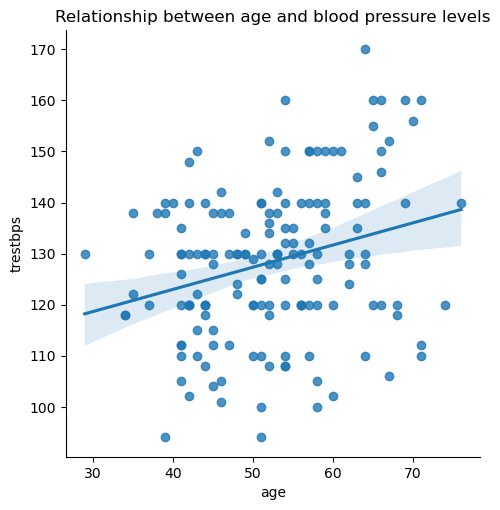

In [60]:
sns.lmplot(x='age', y='trestbps', data=df_good_health)
plt.title('Relationship between age and blood pressure levels')

As we can see above, there is a very slight positive correlation between the two. We can quanitfy this relationship using the R-squared value shown below: 

In [62]:
descriptivemod = smf.ols('trestbps~age', data=df_good_health).fit()
descriptivemod.rsquared

0.0753187284870308

As shown above, the $R^2$ value is only 0.07532. This shows an extremely small positive correlation between the two variables.

Observing if the claim of "blood pressure inceasing with age" holds true for a specific gender:

In [64]:
#mapping numerical sex values of 0 and 1 to Male and Female
df_dup = df_original
df_dup['sex_cat'] = df_dup['sex'].map({0:'Female', 1:'Male'})
df_dup.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_cat
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,Male
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,Male
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,Male
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,Male
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,Female


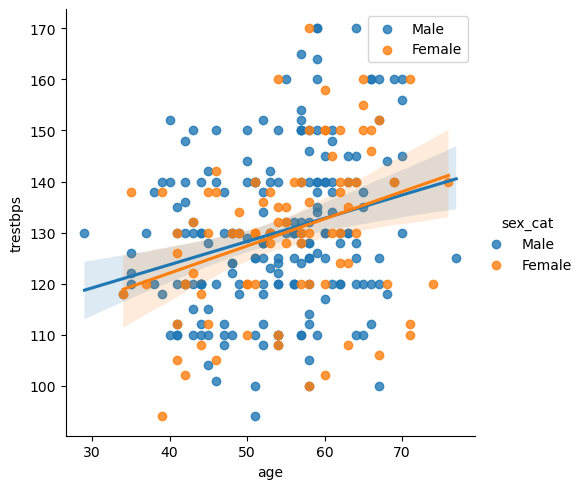

In [65]:
sns.lmplot(x='age', y='trestbps', hue='sex_cat', data=df_dup)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- Correlation between age and blood pressure levels is stronger for women compared to men (by an extremely miniscule amount)
- At a younger age (<50), women have a lower blood pressure level. But, as they get older (>50), women seem to be at a higher risk for increased blood pressure levels

To obtain an alternate view of the relationship **just between sex and blood pressure levels**, the variables can be plotted using a violinplot. This is shown below:

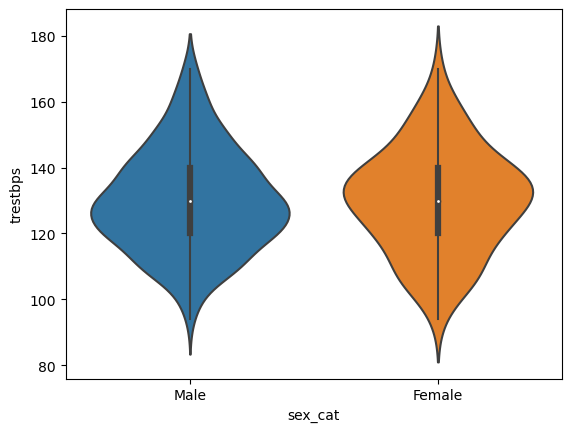

In [66]:
sns.violinplot(x='sex_cat',y='trestbps',data=df_dup)
plt.show()

## 4) Linear Regression Research Question Set 

<u>How is the blood pressure level (in mm/HG) affected by the cholestrol levels, maximum heart rate, exercise induced st depression and the age of the patient?</u>

In [10]:
#First, we separate the columns of the dataset we're using:
df_lin = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_lin

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


**Summary output for Linear Regression**

In [31]:
results = smf.ols('trestbps~chol+age+thalach+oldpeak', data=df_lin).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               trestbps   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     9.826
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.77e-07
Time:                        00:21:05   Log-Likelihood:                -1279.6
No. Observations:                 303   AIC:                             2569.
Df Residuals:                     298   BIC:                             2588.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.7706     11.546      6.822      0.000      56.048     101.493
chol           0.0213      0.019      1.120      0.263      -0.016       0.059
age            0.5584      0.119      4.705      0.000       0.325       0.792
thalach        0.0974      0.048      2.034      0.043       0.003       0.192
oldpeak        2.5954      0.882      2.943      0.004       0.860       4.331
==============================================================================
Omnibus:                       17.815   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.199
Skew:                           0.531   Prob(JB):                     4.11e-05
Kurtosis:                       3.688   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Linear Regression Equation**

$yhat = 78.7706 + 0.0213*chol + 0.5584*age + 0.0974*thalach + 2.5954*oldpeak$

**Conditions**

   - **Linearity condition:** As seen by the residual vs. fitted value plot below, the values are pretty evenly spaced out above and below the x axis. There is an exception of two outliers. However, since there are only two outliers, I believe it is reasonable to say that the linearity condition is satisfied. 
   - **Constant variance of residuals:** As seen through the residual vs fitted value plot below, the y axis spread of points very slightly change as we move from left to right. Hence, I believe it would be appropriate to say that the condition is slightly not met.
   - **True errors are normally dsitributed:** The graph is not normally distributed. It is unimodal and significantly skewed to the right and is not centered  at 0 i.e. does not have a mean 0. Due to the skewness and the fact that it is not centered at 0, I believe the condition of normality of errors is not satisifed.    
   - **Independence of residuals**: 
       - data is randomly sampled
       - sample size n <10% of pop
           - The size of the sample is 303. It is safe to assume that the number of patients in Cleveland is greater than 3030. Hence, this condition is satisifed as well.
   - **No Multicollinearity:** We can see from the pairplots below that most pairwise variables do not seem to have a  relationship. The only slighlty significant relationship that seems to exist is between thalach and age that has an R value of -0.39. (can I ignore this?)

In [32]:
#Checking for linearity:
results.fittedvalues

0      139.488371
1      136.685263
2      140.370872
3      132.048097
4      126.391366
          ...    
298    125.489301
299    143.407269
300    127.702712
301    132.569037
302    120.562260
Length: 303, dtype: float64

In [33]:
results.resid

0       5.511629
1      23.314737
2     -20.370872
3      -2.048097
4       3.608634
         ...    
298   -15.489301
299     0.592731
300     2.297288
301    -2.569037
302    17.437740
Length: 303, dtype: float64

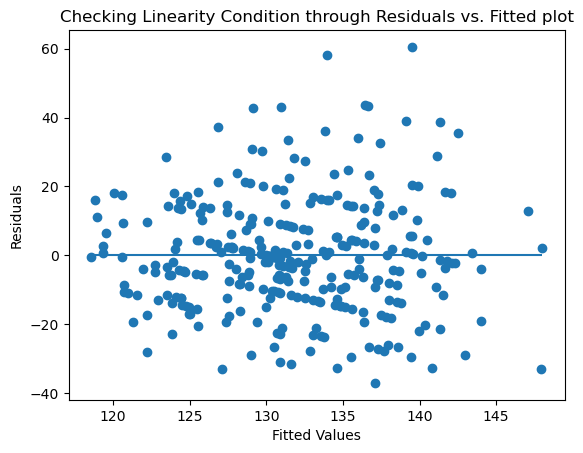

In [34]:
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues))
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Checking Linearity Condition through Residuals vs. Fitted plot')
plt.show()

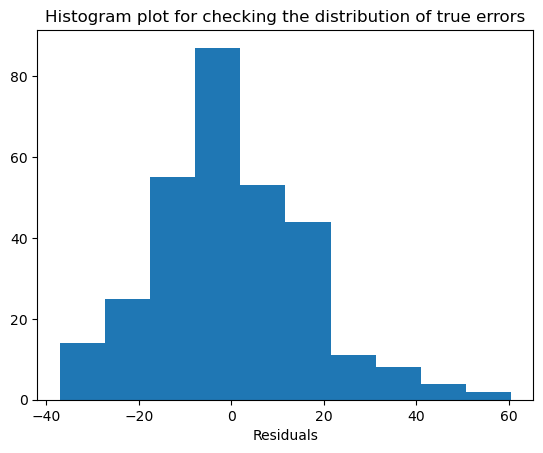

In [35]:
#Checking condition 3: true errors are normally distributed
plt.hist(results.resid)
plt.title('Histogram plot for checking the distribution of true errors')
plt.xlabel('Residuals')
plt.show()

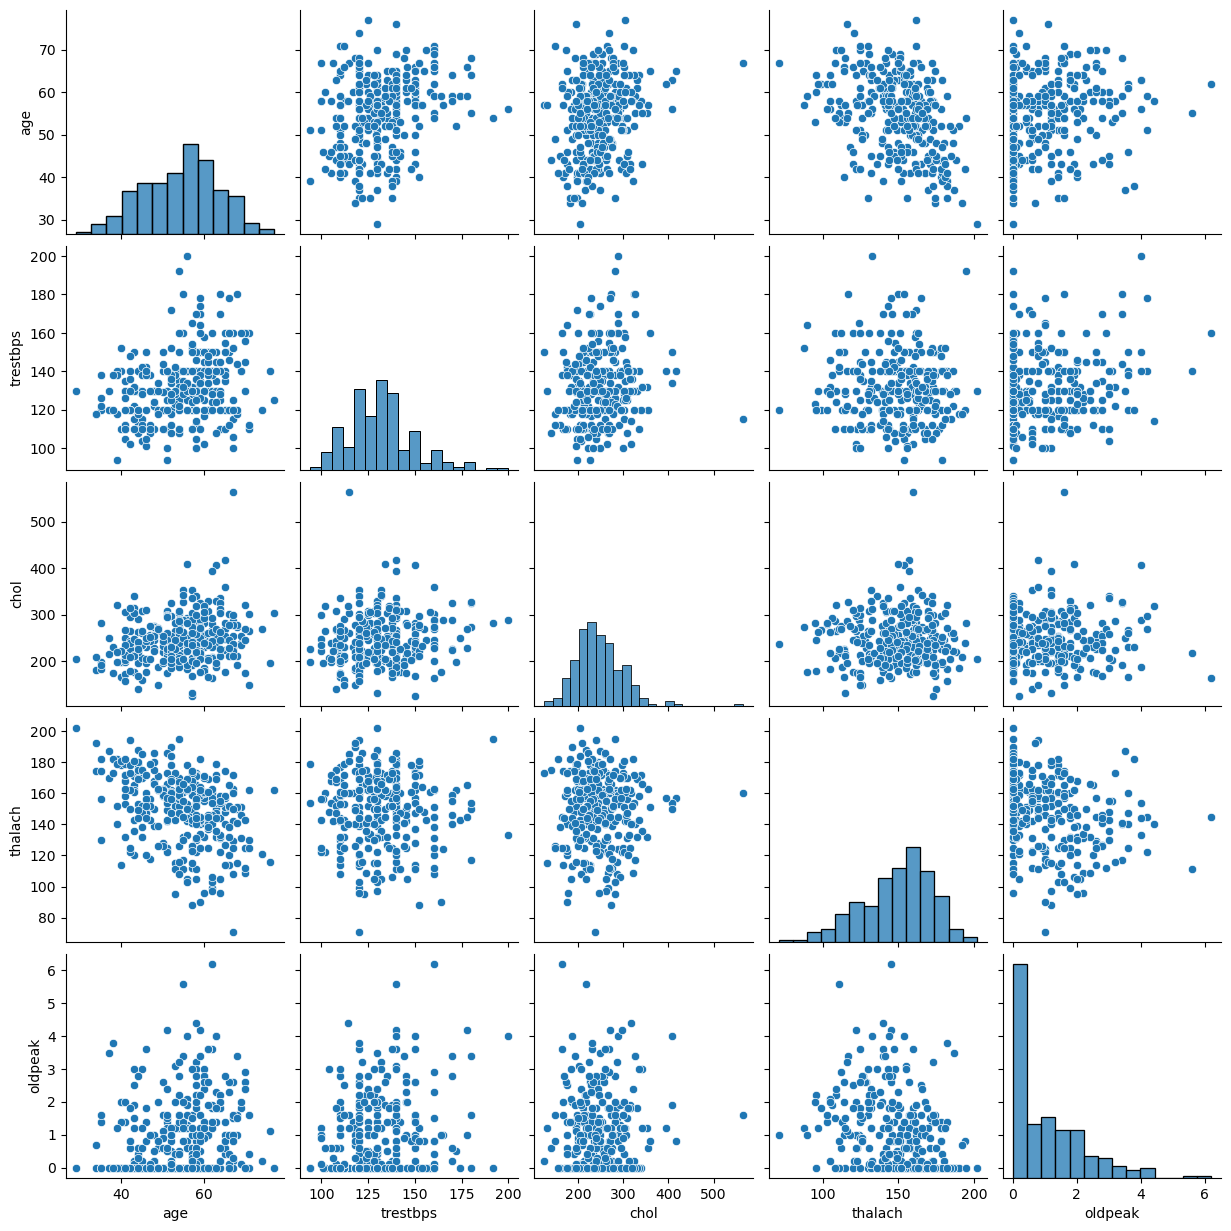

In [36]:
#Observing if there exist in pairwise relationships within the data
sns.pairplot(df_lin)
plt.show()

In [37]:
#Quantifying this relationship to get a clearer picture of pairwise relationships
df_lin.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.284946,0.208950,-0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171
chol,0.208950,0.130120,1.000000,-0.003432,0.046564
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000


Testing the model with a prediction - **what is the patient's blood pressure level at 40 years of age, 200mg/dL cholestrol, max heart rate(thalach) of 174, and an exercise induced ST depression of 2.0?**

$yhat = 78.7706 + 0.0213*200 + 0.5584*40 + 0.0974*174 + 2.5954*2$

$yhat = 78.7706 + 48.7344$

$yhat = 127.505$

**Blood pressure level = 127.505 mm/HG**

**Determining which slopes (variables) are significant in a population model** - Done by comparison to the p value 

Let's assume a 95% confidence to make conclusions about which slopes can be non zero:
- **Slope for chol:** As seen in the summary, the p value for chol is 0.263. This is significantly larger than 0.05. Hence, we don't have enough evidence to reject the null and conclude that this is a non-zero slope
- **Slope for age:** The p value for this slope is approximately 0 i.e. p < 0.05 and we have enough evidence to reject the null and conclude that the slope for age is non-zero
- **Slope for thalach:** The p value for this slope is 0.043 i.e. p<0.05, hence there is enough evidence to reject null and conclude that the slope for thalach is non-zero
- **Slope for oldpeak:** The p value for this slope is 0.004 i.e. p<0.05, hence there is enough evidence to reject null and conclude that the slope for oldpeak is non-zero

## 5) Logistic Regression Question Set

<u>Is there a relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the log odds of the heart health of the patient?</u>

**Splitting the dataset into a training and testing**

The training data set will be a random selection of 80% of the observation from df, and the test will be 20%.

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size=0.20,
                                     random_state=123)
#Double checking the percentage of values in df_train:
df_train.shape[0]/df.shape[0]

0.7986798679867987

**Performing a backwards elimination algorithm to find a parsimino** Starting with four (or more) explanatory variables and using your training
dataset, perform a backwards elimination algorithm (using AIC or BIC) to
help you find a parsimonious logistic regression model

<u>Iteration 1 of backwards elimination - fitting the model with all 4 explanatory variables:</u>

In [30]:
mod1 = smf.logit('target~chol+trestbps+thalach+oldpeak',data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.534858
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2246
Time:                        01:35:28   Log-Likelihood:                -162.06
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.993e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8226      1.502      1.214      0.225      -1.121       4.766
chol           0.0033      0.003      1.241      0.214      -0.002       0.008
trestbps       0.0125      0.008      1.552      0.121      -0.003       0.028
thalach       -0.0345      0.007     -5.072      0.000      -0.048      -0.021
oldpeak        0.6985      0.141      4.956      0.000       0.422       0.975
==============================================================================
"""

In [13]:
print('Iteration 1 BIC with all 4 variables:',mod1.bic)

Iteration 1 BIC with all 4 variables: 369.5278438293357


Deleting the explanatory variable 'thalach' from the regression:

In [31]:
mod2 = smf.logit('target~chol+trestbps+oldpeak',data=df).fit()
mod2.summary()
print('Iteration 1 BIC with thalach deleted:', mod2.bic)

Optimization terminated successfully.
         Current function value: 0.583828
         Iterations 6
Iteration 1 BIC with thalach deleted: 376.6544913903219


Deleting thalach resulted in a higher BIC, so I'm going to try another variable.

Deleting the explanatory variable 'oldpeak' from the regression:

In [32]:
mod3 = smf.logit('target~chol+trestbps+thalach',data=df).fit()
mod3.summary()
print('Iteration 1 BIC with oldpeak deleted:', mod3.bic)

Optimization terminated successfully.
         Current function value: 0.582251
         Iterations 6
Iteration 1 BIC with oldpeak deleted: 375.6992373026347


Deleting the explanatory variable 'trestbps' from the regression:

In [33]:
mod4 = smf.logit('target~chol+thalach+oldpeak',data=df).fit()
print('Iteration 1 BIC with trestbps deleted:', mod4.bic)

Optimization terminated successfully.
         Current function value: 0.538857
         Iterations 6
Iteration 1 BIC with trestbps deleted: 349.4024895972183


The value of BIC fell, however, given the chance that deleting 'chol' may yield a smaller BIC value:

Deleting the explanatory variable 'chol' from the regression: 

In [34]:
mod5 = smf.logit('target~trestbps+thalach+oldpeak',data=df).fit()
print('Iteration 1 BIC with chol deleted:', mod5.bic)

Optimization terminated successfully.
         Current function value: 0.537454
         Iterations 6
Iteration 1 BIC with chol deleted: 348.55207598653203


As seen above, the model that observed the lowest value of BIC was mod5. Hence, this becomes the new model and the following iteration tests out BIC with the remaining variables of 'thalach', 'trestbps', and 'oldpeak'.

<u> Iteration 2 of backwards elimination: </u>

In [39]:
print('Current BIC:', mod5.bic)

Current BIC: 348.55207598653203


Deleting the variable 'thalach' from mod5 regression: 

In [35]:
mod6 = smf.logit('target~trestbps+oldpeak',data=df).fit()
print('Iteration 2 BIC with thalach deleted:', mod6.bic)

Optimization terminated successfully.
         Current function value: 0.585503
         Iterations 6
Iteration 2 BIC with thalach deleted: 371.9559118755397


Deleting the variable 'oldpeak' from mod5 regression:

In [36]:
mod7 = smf.logit('target~trestbps+thalach',data=df).fit()
print('Iteration 2 BIC with oldpeak deleted:', mod7.bic)

Optimization terminated successfully.
         Current function value: 0.585233
         Iterations 6
Iteration 2 BIC with oldpeak deleted: 371.7922444106459


Deleting the variable 'trestbps' from mod5 regression:

In [37]:
mod8 = smf.logit('target~thalach+oldpeak',data=df).fit()
print('Iteration 2 BIC with trestbps deleted:', mod8.bic)

Optimization terminated successfully.
         Current function value: 0.542314
         Iterations 6
Iteration 2 BIC with trestbps deleted: 345.7834487744224


As seen above, the model that observed the lowest value of BIC was mod8. Hence, this becomes the new current model and the following iteration tests out BIC with the remaining variables of 'thalach', and 'oldpeak'.

<u> Iteration 3 of backwards elimination: </u>

In [38]:
print('Current BIC:',mod8.bic)

Current BIC: 345.7834487744224


Deleting the variable 'thalach' from mod8 regression:

In [40]:
mod9 = smf.logit('target~oldpeak',data=df).fit()
print('Iteration 3 BIC with thalach deleted:',mod9.bic)

Optimization terminated successfully.
         Current function value: 0.589440
         Iterations 6
Iteration 3 BIC with thalach deleted: 368.6280693661783


Deleting the variable 'oldpeak' from mod8 regression:

In [43]:
mod10 = smf.logit('target~thalach',data=df).fit()
print('Iteration 3 BIC with oldpeak deleted:',mod10.bic)

Optimization terminated successfully.
         Current function value: 0.595548
         Iterations 5
Iteration 3 BIC with oldpeak deleted: 372.32957064258574


As seen above, there were no models that had a lower BIC score than mod8. Hence, the parsimonious logistic regression mode is mod8. The summary is shown below:

In [44]:
final_model = mod8
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2137
Time:                        01:37:37   Log-Likelihood:                -164.32
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.982e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0992      1.043      3.932      0.000       2.056       6.142
thalach       -0.0335      0.007     -4.995      0.000      -0.047      -0.020
oldpeak        0.7203      0.139      5.183      0.000       0.448       0.993
==============================================================================
"""

**iii)** Then fit your final parsimonious logistic regression model with just your
training dataset

In [46]:
final_model_train = smf.logit('target~thalach+oldpeak',data=df_train).fit()
final_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.535818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      239
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2231
Time:                        01:40:14   Log-Likelihood:                -129.67
converged:                       True   LL-Null:                       -166.91
Covariance Type:            nonrobust   LLR p-value:                 6.671e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9161      1.172      3.343      0.001       1.620       6.212
thalach       -0.0327      0.008     -4.351      0.000      -0.047      -0.018
oldpeak        0.7722      0.155      4.986      0.000       0.469       1.076
==============================================================================
"""

**iv)** Show the summary output for your final logistic regression model (would this be df or df_test)

In [60]:
final_model = smf.logit('target~thalach+oldpeak',data=df_test).fit()
final_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.562334
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      239
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.2231
Time:                        11:12:36   Log-Likelihood:                -129.67
converged:                       True   LL-Null:                       -166.91
Covariance Type:            nonrobust   LLR p-value:                 6.671e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9161      1.172      3.343      0.001       1.620       6.212
thalach       -0.0327      0.008     -4.351      0.000      -0.047      -0.018
oldpeak        0.7722      0.155      4.986      0.000       0.469       1.076
==============================================================================
"""

**v)** Write out the logistic regression equation for your final model 

$log(\frac{\hat{p}}{1-\hat{p}}) = 3.9161 - 0.0327*(thalach) + 0.7722*(oldpeak)$

**vi)** Which slopes in your final model do we have sufficient evidence to
suggest are non-zero in the population model? Explain your answer

In order to check if there is sufficient evidence to suggest that the slopes of 'thalach' and 'oldpeak' are non-zero, I need to check the p values and compare them to the $\alpha = 0.05$. 
- Slope for 'thalach': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero. 
- Slope for 'oldpeak': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero.  

So I have enough evidence to suggest all slopes in my model are non-zero.

**vii)** Use your logistic regression model to calculate the ROC and AUC of your
train dataset

In [74]:
#Calculating predictive probabilites: should I do this using the train datatset?
phat_test = final_model_train.predict(exog=df_train
                                [['thalach', 'oldpeak']])
phat_test.head(10)

102    0.216729
261    0.258101
228    0.594693
288    0.195341
78     0.139758
124    0.333067
200    0.216729
197    0.288761
24     0.810265
174    0.758200
dtype: float64

In [75]:
df_train['phat_test']=phat_test
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,phat_test
102,57,0,3,128,303,0,2,159,0,0.0,0,1,1,0,0.216729
261,58,0,1,136,319,1,2,152,0,0.0,0,2,1,1,0.258101
228,54,1,3,110,206,0,2,108,1,0.0,1,1,1,1,0.594693
288,56,1,1,130,221,0,2,163,0,0.0,0,0,3,0,0.195341
78,48,1,1,130,245,0,2,180,0,0.2,1,0,1,0,0.139758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,59,1,3,140,177,0,0,162,1,0.0,0,1,3,1,0.200533
83,68,1,2,180,274,1,2,150,1,1.6,1,0,3,1,0.560983
17,54,1,3,140,239,0,0,160,0,1.2,0,0,1,0,0.403513
230,52,0,2,136,196,0,2,169,0,0.1,1,0,1,0,0.177305


In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_train['target'], y_score=df_train['phat_test'])
auc_pew = roc_auc_score(y_true=df_train['target'], y_score=df_train['phat_test'])

In [51]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

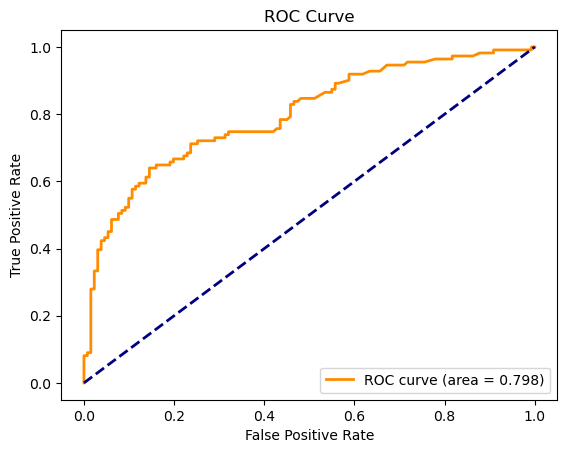

In [77]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

The AUC for test dataset is 0.792. The AUC is closer to the value of 1 than it is to 0.5, which suggests that predictive probability threshold of 0.5 does an okay job of getting close to the ideal scenario of a false positive rate of 0 and true positive rate of 1. 

**viii)** Use your ROC to pick a good predictive probability threshold. Explain
why this is a good predictive probability threshold, given your research
goals

To pick a good probability threshold, I first need to identify  points of fpr and tpr that are closest to the ideal situation of fpr = 0 and tpr = 1. There are 2 options from the above ROC curve that stand out for this point:
- Option 1: Approximately (FPR = 0.1, TPR = 0.49)
    - Past the 0.1 mark of FPR, the FPR starts to level off. Decreasing the TPR further does not give me a substantial decrease in the FPR level. Hence, this is one option that could give result a probable predictive threshold
- Option 2: Approximately (FPR = 0.6, TPR = 0.92)
    - At the 0.93 mark, the TPR starts to level off. Since the TPR level is already 0.92 at this stage, increasing the FPR for a slight increase of 0.08 does not make much sense. Hence, this option could also result in an ideal predictive threshold
    
For my scenario, I believe the true positive rate is much more important than the false positive rate. My model predicts the patient's heart health i.e. if the patient has a heart disease or is normal. Getting a positive result that evnetually turns out to be false is not that big of a deal. It is more important to ensure that the patient's who have a heart disease definitely get a positive result. Getting a negative result could be life threatening. Hence, I will choose a predictive proability threshold that maximizes the TPR i.e. a probability threshold for option 2 (FPR=0.6, TPR=0.92).

In [78]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_train['target'], df_train['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr       fpr
0       0.07  1.0  0.992366
   threshold       tpr       fpr
0       0.08  0.990991  0.992366
   threshold       tpr       fpr
0       0.09  0.990991  0.992366
   threshold       tpr       fpr
0        0.1  0.990991  0.984733
   threshold       tpr       fpr
0       0.11  0.990991  0.961832
   threshold       tpr       fpr
0       0.12  0.990991  0.938931
   threshold       tpr       fpr
0       0.13  0.990991  0.908397
   threshold       tpr      fpr
0       0.14  0.981982  0.89313
   threshold       tpr       fpr
0       0.15  0.972973  0.832061
   threshold       tpr       fpr
0       0.16  0.963964  0.816794
   threshold       tpr       f

As seen from the above result, the predictive probability threshold that most closely matches option 2 is **p = 0.22**

**ix)** Use this predictive probability threshold to classify your test data. What is
the false positive rate and the true positive rate of your classification of
the test data?

In [80]:
df_test['target_hat'] = df_test['phat_test'] > 0.22
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,phat_test,target_hat
11,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0,0.478850,True
292,44,1,3,120,169,0,0,144,1,2.8,2,0,2,1,0.797074,True
269,42,1,2,130,180,0,0,150,0,0.0,0,0,1,0,0.270825,True
268,40,1,3,152,223,0,0,181,0,0.0,0,0,3,1,0.118735,False
94,63,0,2,135,252,0,2,172,0,0.0,0,0,1,0,0.153155,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,3,128,255,0,0,161,1,0.0,0,1,3,1,0.205829,False
26,58,0,2,120,340,0,0,172,0,0.0,0,0,1,0,0.153155,False
259,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1,0.385949,True
143,64,1,2,125,309,0,0,131,1,1.8,1,0,3,1,0.735187,True


In [81]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [82]:
confusion_matrix(y_true=df_test['target'], y_pred=df_test['target_hat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['target'],
                                 y_pred=df_test['target_hat']).ravel()
(tn, fp, fn, tp)

(12, 21, 4, 24)

In [83]:
tpr = 24/(24+4)
fpr = 21/(21+12)
print(tpr, fpr)

0.8571428571428571 0.6363636363636364


The total positive rate is 0.8512 and the false positive rate 0.6363. Evaluating this value, I would probably take a higher threshold to ensure that my true postive rate is higher. This is because (as mentioned previously), having a high false positive rate is not harmful, however having a low true positive rate is extremely detrimental.

Discuss how your logistic regression analysis helps answer your research
question

The logistic regression shows the level of impact each of the explanatory variables have on the log odds of hearth health of a patient. As seen in my very first model, 'chol', 'trestbps', and 'oldpeak' had a positive relationship with the log odds hearth health of the patient (as suggested by the coefficient). Among these cholestrol was the least impactful with a slope of only 0.033. 'thalach' or heart rate showed a slight negative relationship with the response variable (log odds of heart health of patient). I also observed that my findings for 'thalach' and 'oldpeak' can be extended to the population (through the p value test) as there is enough evidence to suggest that their slopes are non-zero. 
 

## 6) Conclusion

**i)** Summarize the findings of your individual research questions in
the conclusion. Provide at least a paragraph

Research Questions:
1. <u>What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change  if we segregate based on the sex of the patient?</u>
    - Through the use of a scatterplot, a line of best fit and an R squared value, I observed that there was no significant correlation between the age of a patient and their blood pressure at rest. This was an interesting observation to me because I've always assumed the older a person gets, the higher their blood pressure gets. In addition to this observation, I also saw that sex does not impact the relationship between age and the patient's blood pressure at rest. However, I did note that at a younger age (<50), women have a lower blood pressure level. But, as people get older (>50), women seem to be at a higher risk for increased blood pressure levels. While this could be purely coincidental (due to the extremely small difference in blood pressure levels between men and women), I did think it would be something interesting to look into further. 
    

2. <u>Are the average cholestrol levels in normal people equal to the average cholestrol levels in people with heart disease?</u>
    - Through a difference in population means hypothesis test, I observed that there is not enough evidence to suggest that patients with poor heart health have higher levels of cholestrol when compared to patients with normal heart health. While a small sample from Cleveland is not enough to make a definitive statement, it shed some light into my motivation for researching this question i.e. understanding if cholestrol is actually bad for you. 


3. <u>How is the blood pressure level (in mm/HG) affected by the cholestrol levels, maximum heart rate, exercise induced st depression and the age of the patient?</u>
    - Through my linear regression, I observed that I have enough evidence to suggest that the slopes for all my variables are non-zero. This implies that all the above variables have some impact (however small it may be) on the blood pressure level of a patient. Through the size of my coefficients, I identified the descending order of magnitude of impact these variables have on the blood pressure level. This order is: age, oldpeak, thalach, and cholestrol.  


4. <u>What is the relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the heart health of the patient?</u>
    - Through my logistic regression, I learned how (direction and magnitude) each of the explanatory variables were related to the response variable. 'chol', 'trestbps', and 'oldpeak' had a positive relationship with the log odds hearth health of the patient (as suggested by the coefficient). 'thalach' or heart rate showed a slight negative relationship with the response variable (log odds of heart health of patient). I also observed that my findings for 'thalach' and 'oldpeak' can be extended to the population (through the p value test) as there is enough evidence to suggest that their slopes are non-zero. 


**ii)** If you (or someone else) were to conduct future work based on
these analyses, what kind of research questions or analyses might that entail?

- One path of research could be a modification to my descriptive analysis research question. My descritptive research question was: **What is the relationship between age and the patient's blood pressure at rest? How does the relationship between these two change  if we segregate based on the sex of the patient?** While seeing how the relatoinship changed based on sex was interesting, I believe a more applicable research question could be how the relationship (between age and blood pressure) changed based on the heart health of the patient. This would give a clearer idea of how closely age and heart health are related
- There are several variables in the dataset that have not been used in my research questions that could be explored. For example, while my analysis concluded that there is no significant relationship between cholestrol levels and heart diseases, maybe there exists a correlation between cholestrol levels and blood disorders like thalassemia. Similarly, I could also observe the relationship between age (or sex) and thalassemia. This would also give me relationships that could be potentially life saving in a real-world scenario
- Another important relationship that I think would be useful is the relationship between type of chest pain and age. This would show certain symptoms that people should take seriously when they age (if there is a positive relatoinship)